In [4]:
# import library drive to get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Gde Ondy Janeswara***

***First Question RFM and Clustering with KMeans***

In [2]:
# import library that needed to this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [5]:
# load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/first question/user-events.csv")

In [6]:
# first glance at data
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


In [ ]:
# see data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [ ]:
# see simple statistic from column price (ignore other column since other columns consist of id)
df[['price']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,885129.0,146.328713,296.807683,0.22,26.46,65.71,190.49,64771.06


In [ ]:
# convert column event_time to date and make variable now
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
# checking if there is null value in data
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

There are null values from category_code, brand, user_session columns but just gonna ignore it for now.

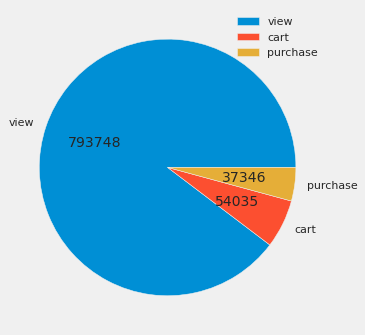

The percentage of view is 89.68% and percentage of cart only 6.1% and percentage of purchase 4.22%


In [111]:
# plot column event_type
plt.pie(df['event_type'].value_counts(), labels = df['event_type'].unique(), autopct = lambda x: '{:.0f}'.format(x*df['event_type'].value_counts().sum()/100))
plt.legend(df['event_type'].unique(), loc = 1)
plt.show()
print('The percentage of view is 89.68% and percentage of cart only 6.1% and percentage of purchase 4.22%')

*   RFM

In [ ]:
# filter dataframe with condition from column event_type purchase only
data = df[df['event_type'].isin(['purchase'])]

In [ ]:
# make recency dataframe
df_recency = data.groupby(by = 'user_id', as_index = False)['event_time'].max()
df_recency.columns = ['user_id', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,user_id,LastPurchaseDate,Recency
0,1515915625353286099,2020-10-03 11:23:44+00:00,148
1,1515915625353457259,2020-09-29 05:52:55+00:00,152
2,1515915625353534622,2020-10-06 10:29:25+00:00,145
3,1515915625353561691,2020-11-25 09:24:42+00:00,95
4,1515915625353900095,2020-10-15 05:09:35+00:00,136


In [ ]:
# make frequency dataframe
frequency_df = data.drop_duplicates().groupby(by = ['user_id'], as_index = False)['event_time'].count()
frequency_df.columns = ['user_id', 'Frequency']
frequency_df.head()

,user_id,Frequency
0,1515915625353286099,1
1,1515915625353457259,1
2,1515915625353534622,3
3,1515915625353561691,2
4,1515915625353900095,2


In [ ]:
# make monetary value
monetary_df = data.groupby(by='user_id', as_index=False)['price'].sum()
monetary_df.columns = ['user_id', 'Monetary']
monetary_df.head()

,user_id,Monetary
0,1515915625353286099,119.03
1,1515915625353457259,55.16
2,1515915625353534622,57.15
3,1515915625353561691,345.72
4,1515915625353900095,57.85


In [ ]:
# merge recency, frequency, monetary dataframe into rfm dataframe
rf_df = df_recency.merge(frequency_df, on = 'user_id')
rfm_df = rf_df.merge(monetary_df, on = 'user_id').drop(columns = 'LastPurchaseDate')
rfm_df.head()

,user_id,Recency,Frequency,Monetary
0,1515915625353286099,148,1,119.03
1,1515915625353457259,152,1,55.16
2,1515915625353534622,145,3,57.15
3,1515915625353561691,95,2,345.72
4,1515915625353900095,136,2,57.85


In [ ]:
# normalizing rank of customers
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1515915625353286099,148,1,119.03,4.094366,31.916541,31.916541
1,1515915625353457259,152,1,55.16,2.107221,31.916541,31.916541
2,1515915625353534622,145,3,57.15,5.667130,87.945926,87.945926
3,1515915625353561691,95,2,345.72,37.273091,73.903962,73.903962
4,1515915625353900095,136,2,57.85,10.079345,73.903962,73.903962


In [ ]:
# calcuating rfm score with formula 0.15*Recency score + 0.28*Frequency score + 0.57*Monetary score
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df = rfm_df.round(0)
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,1515915625353286099,148,1,119.0,4.0,32.0,32.0,28.0
1,1515915625353457259,152,1,55.0,2.0,32.0,32.0,28.0
2,1515915625353534622,145,3,57.0,6.0,88.0,88.0,76.0
3,1515915625353561691,95,2,346.0,37.0,74.0,74.0,68.0
4,1515915625353900095,136,2,58.0,10.0,74.0,74.0,64.0


In [ ]:
# Segment customers based on rfm score, 0 - 50 = low value 51 - 75 = medium value 76 - 100 = high value
rfm_df['Customer_segment'] = np.where(rfm_df['RFM_Score'] > 75 ,'High Value', (np.where(rfm_df['RFM_Score'] < 50 , 'Low value' , 'Medium Value')))
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1515915625353286099,148,1,119.0,4.0,32.0,32.0,28.0,Low value
1,1515915625353457259,152,1,55.0,2.0,32.0,32.0,28.0,Low value
2,1515915625353534622,145,3,57.0,6.0,88.0,88.0,76.0,High Value
3,1515915625353561691,95,2,346.0,37.0,74.0,74.0,68.0,Medium Value
4,1515915625353900095,136,2,58.0,10.0,74.0,74.0,64.0,Medium Value


*   Clustering with KMeans

In [ ]:
# transform rfm_df
rfm1 = rfm_df[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
x_scaled = scaler.fit(rfm1)
x_scaled = scaler.fit_transform(rfm1)
x_scaled

array([[ 1.6511165 , -0.43219843, -0.28559678],
       [ 1.73982014, -0.43219843, -0.43593637],
       [ 1.58458876,  0.71594739, -0.43123826],
       ...,
       [-1.63091835,  0.71594739,  2.82925166],
       [-1.63091835, -0.43219843, -0.47352127],
       [-1.63091835, -0.43219843, -0.52989861]])

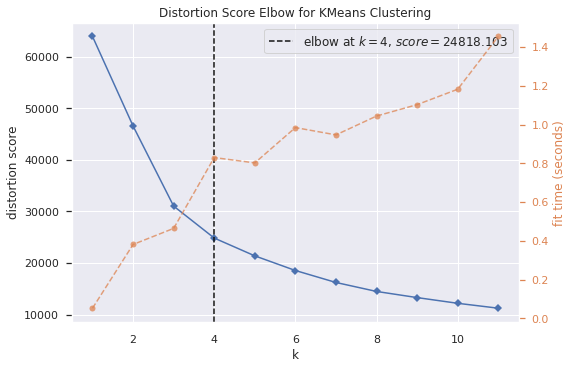

In [ ]:
# determine number of cluster using Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()   

According to the Elbow method, the number of clusters is 4. It's different from what we choose previously.

[3 3 3 ... 2 3 3]
Our cluster centers are as follows
[[ 0.92885875 -0.1429595  -0.28200061]
 [-0.82506917 -0.16563067 -0.07785671]
 [-0.34407534  1.96565014  2.36644935]
 [-0.40606886 14.18752498 10.7609963 ]]


,Recency,Frequency,Monetary
Cluster_pred,,,
0,9643,9643,9643
1,10273,10273,10273
2,1358,1358,1358
3,30,30,30


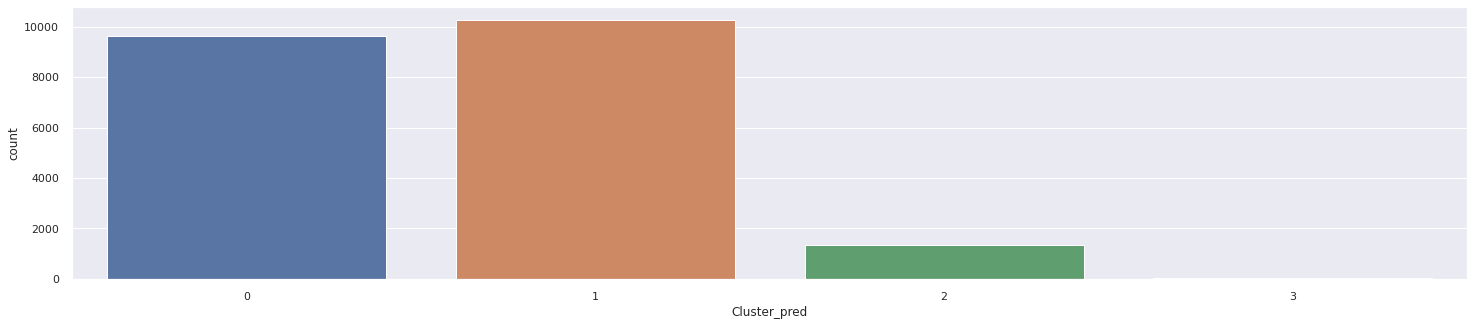

In [ ]:
# apply KMeans
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)

identified_clusters = kmeans_scaled.fit_predict(rfm1)

clusters_scaled = rfm1.copy()
clusters_scaled['Cluster_pred'] = kmeans_scaled.fit_predict(x_scaled)

print(identified_clusters)
sns.set(style = "darkgrid")
print('Our cluster centers are as follows')
print(kmeans_scaled.cluster_centers_)

f, ax = plt.subplots(figsize = (25, 5))
ax = sns.countplot(x = 'Cluster_pred', data = clusters_scaled)
clusters_scaled.groupby(['Cluster_pred']).count()

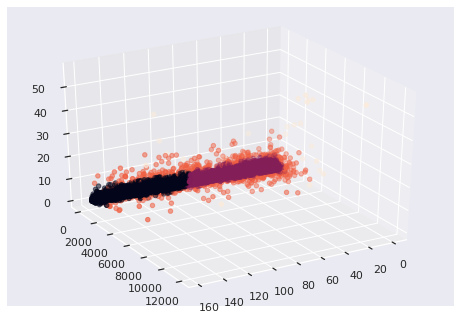

In [ ]:
# visualizing cluster
fig = plt.figure()
ax = plt.axes(projection = '3d')
xline =  clusters_scaled['Recency']
yline = clusters_scaled['Frequency']
zline = clusters_scaled['Monetary']

ax.scatter3D(xline, zline,yline,c = clusters_scaled['Cluster_pred'])
ax.view_init(30, 60)

*   Conclusion



> *   Column category_code, brand, user_session have many null values
> *   Many users only view aka window shopper
> *   Between number of cluster from RFM and KMeans is different. Maybe should add another type of customers in RFM. 